<a href="https://colab.research.google.com/github/jericohd/Scrapy_NASA/blob/main/Actividad_4_EDA_A01795534.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Hernandez Diaz Irving Jerico
*   MATRÍCULA: A01795534

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
#os.chdir(DIR)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [51]:
df.info

<bound method DataFrame.info of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amn

 2. Determina el porcentaje de valores faltantes por columna.

In [52]:
missing_values = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
print(missing_values)


                                   0
loan_int_rate               9.563856
person_emp_length           2.747000
person_age                  0.000000
person_income               0.000000
person_home_ownership       0.000000
loan_intent                 0.000000
loan_grade                  0.000000
loan_amnt                   0.000000
loan_status                 0.000000
loan_percent_income         0.000000
cb_person_default_on_file   0.000000
cb_person_cred_hist_length  0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [53]:
df.describe().loc[['mean', '50%']]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
mean,27.7346,66074.84847,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
50%,26.0000,55000.00000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000


In [54]:
df.describe().loc[['min', 'max', 'std', '25%', '75%']]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000
std,6.348078,6.198312e+04,4.14263,6322.086646,3.240459,0.413006,0.106782,4.055001
25%,23.000000,3.850000e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
75%,30.000000,7.920000e+04,7.00000,12200.000000,13.470000,0.000000,0.230000,8.000000


In [55]:
df.kurt()


<ipython-input-55-8bd0d54cd88d>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

In [56]:
df.skew()

<ipython-input-56-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [57]:
#Clasifica las variables person_age y loan_in_rate según los valores...
# Clasificación de la variable person_age según asimetría y curtosis
if df['person_age'].skew() > 0:
  asimetria = 'Derecha'
else:
  asimetria = 'Izquierda'

if df['person_age'].kurt() > 0:
  curtosis = 'Leptocúrtica'
else:
  curtosis = 'Platicúrtica'

print(f'La variable person_age es {asimetria} y {curtosis}')




La variable person_age es Derecha y Leptocúrtica


In [58]:
# Clasificación de la variable loan_in_rate según asimetría y curtosis
if df['loan_int_rate'].skew() > 0:
  asimetria = 'Derecha'
else:
  asimetria = 'Izquierda'

if df['loan_int_rate'].kurt() > 0:
  curtosis = 'Leptocúrtica'
else:
  curtosis = 'Platicúrtica'

print(f'La variable loan_in_rate es {asimetria} y {curtosis}')

La variable loan_in_rate es Derecha y Platicúrtica


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

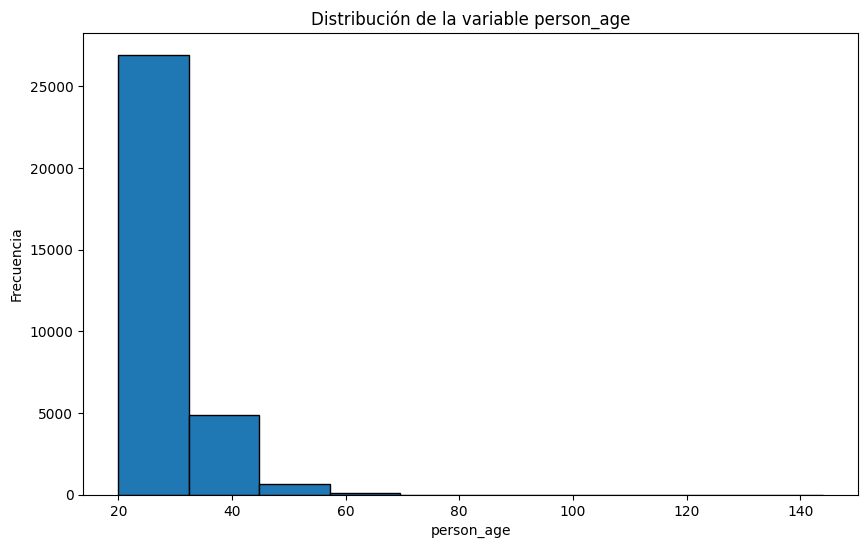

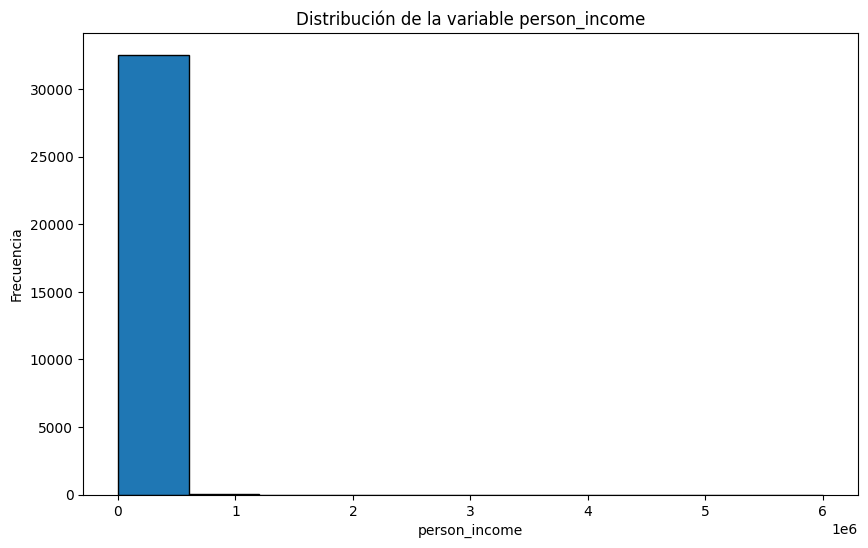

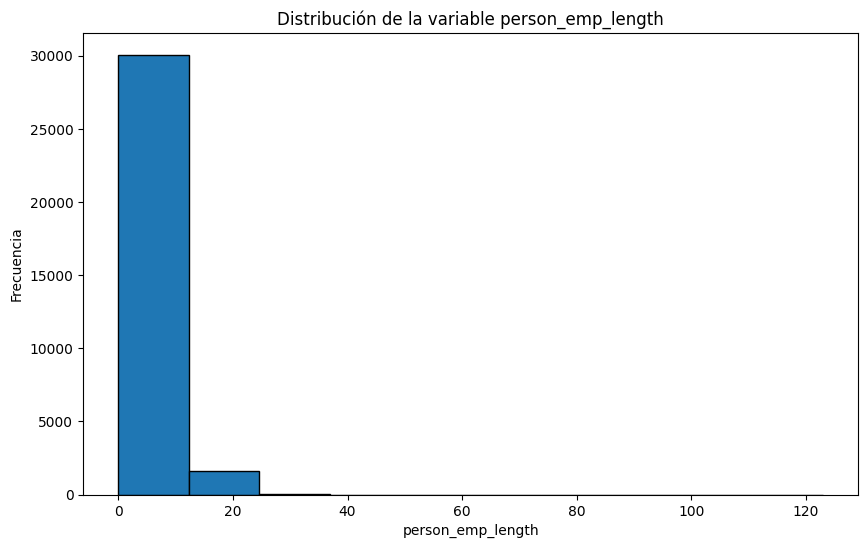

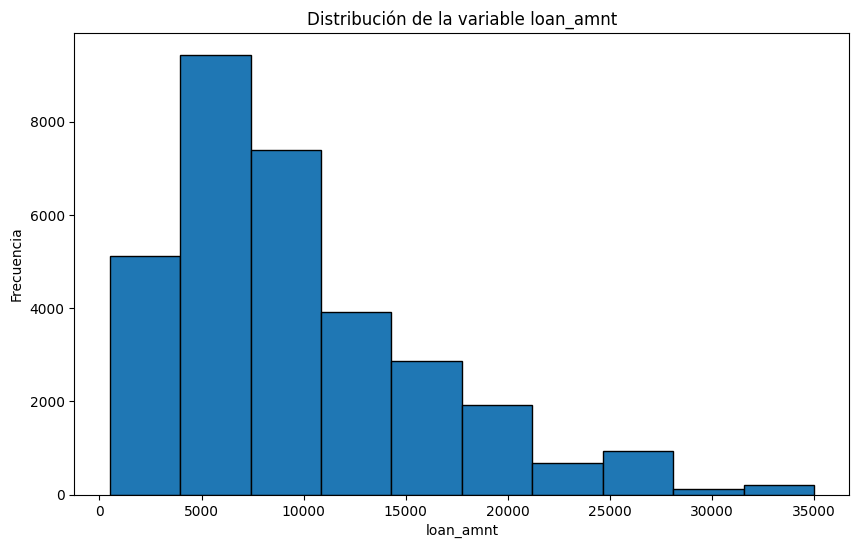

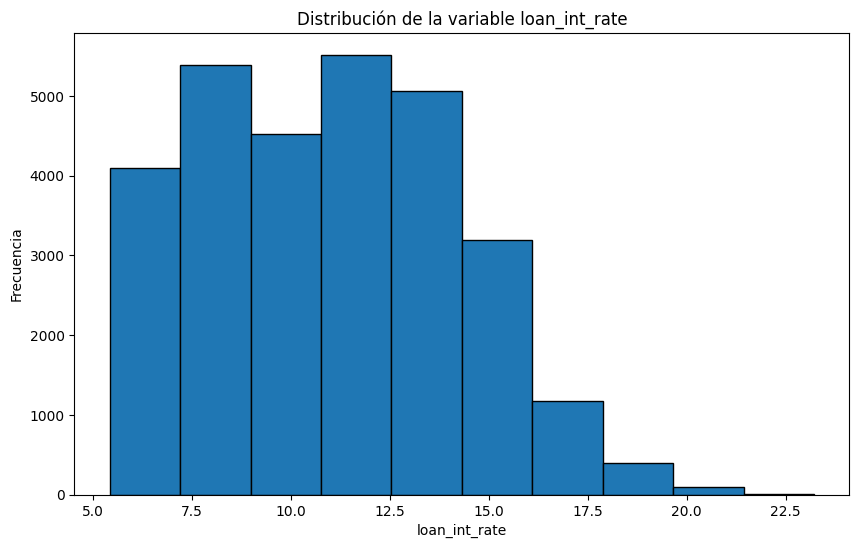

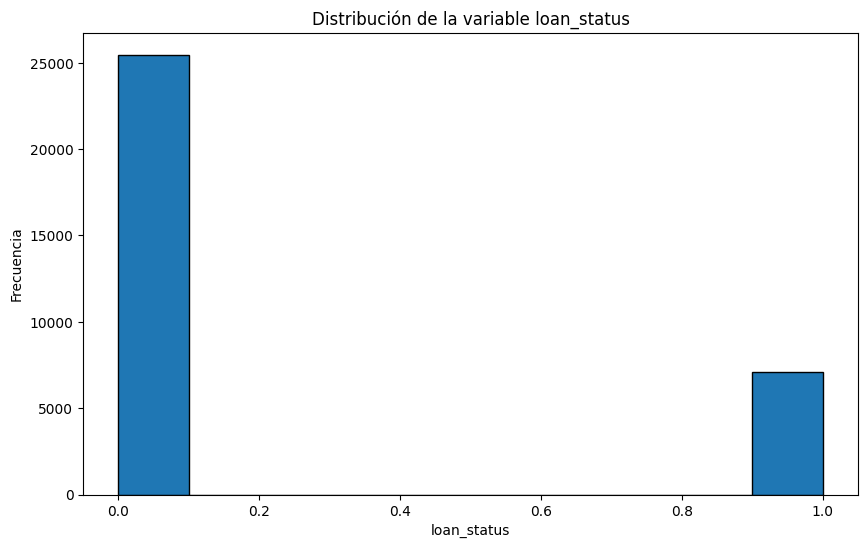

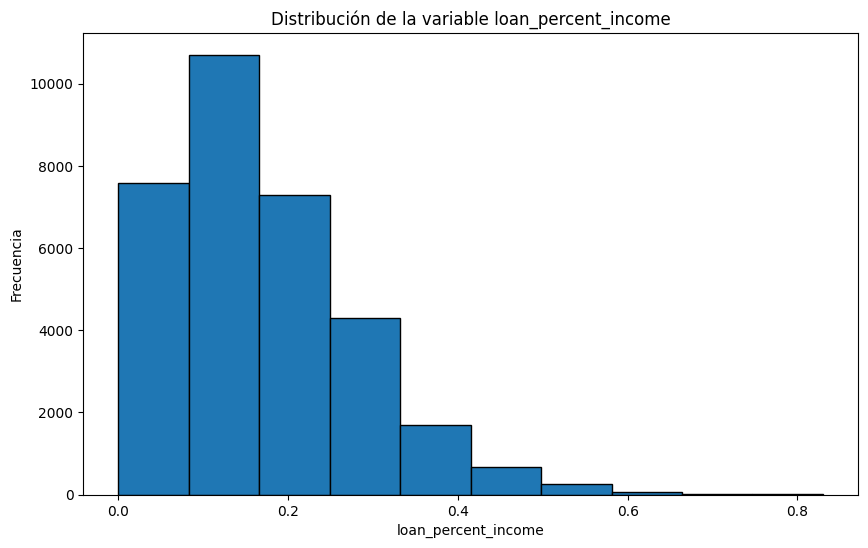

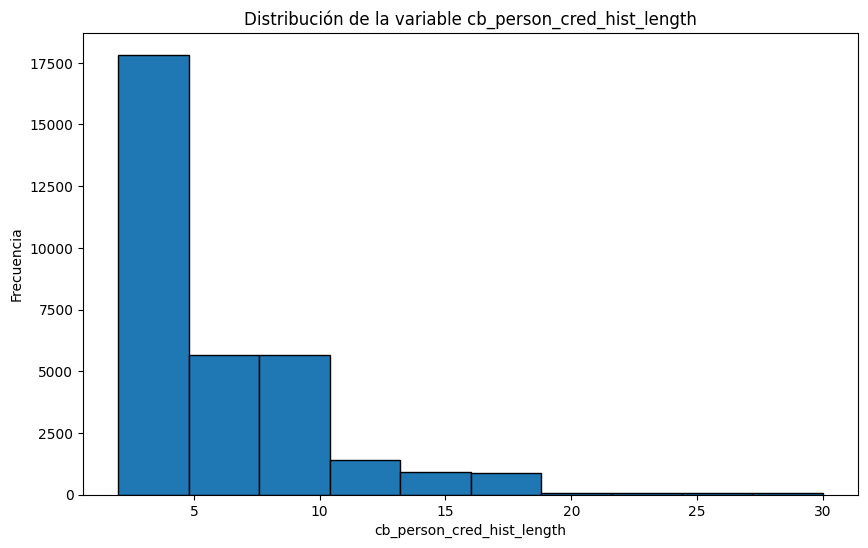

In [59]:
import matplotlib.pyplot as plt
for col in df.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=10, edgecolor="black")
    plt.title(f"Distribución de la variable {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


▶
¿Se corresponde con lo obtenido en el cálculo de asimetría?
 Sí, en general, la forma de los histogramas se corresponde con lo obtenido en el cálculo de asimetría.

 Por ejemplo, la variable `person_age` tiene una asimetría mayor a 0, lo que significa que está sesgada hacia la derecha. Esto se refleja en el histograma, que muestra una cola larga hacia la derecha.

 La variable `loan_int_rate` tiene una asimetría negativa, lo que significa que está sesgada hacia la izquierda. Esto se refleja en el histograma, que muestra una cola larga hacia la izquierda.

▶




5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

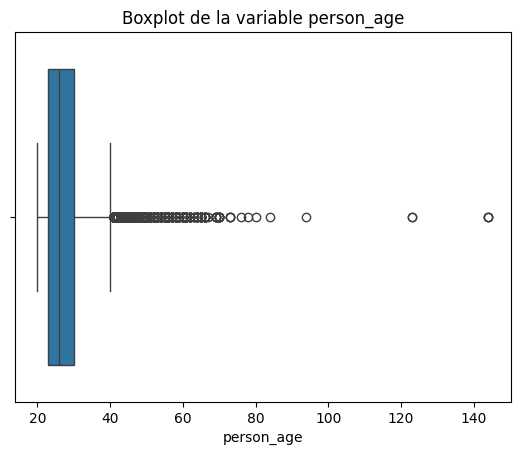

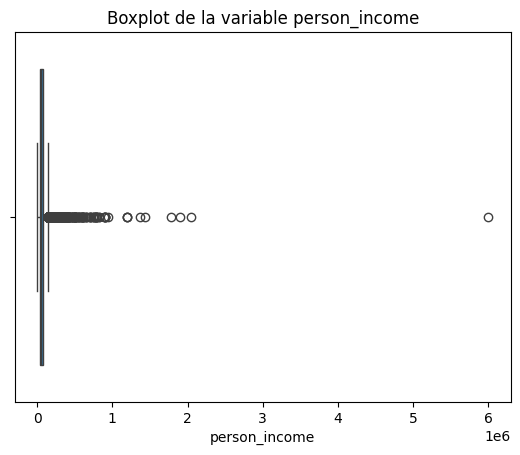

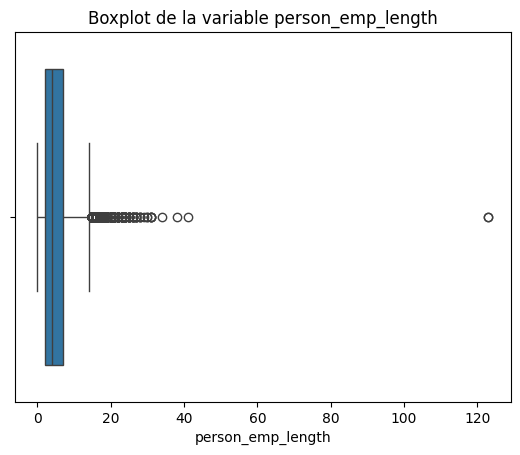

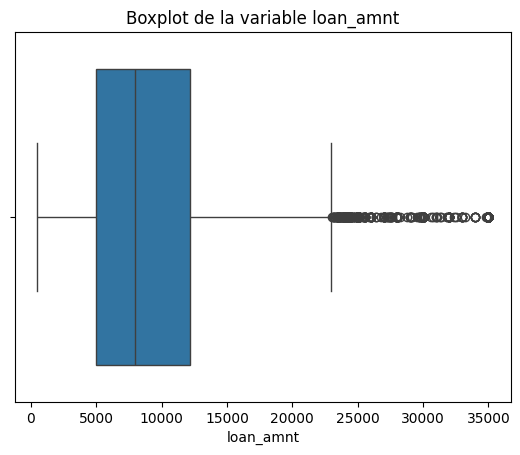

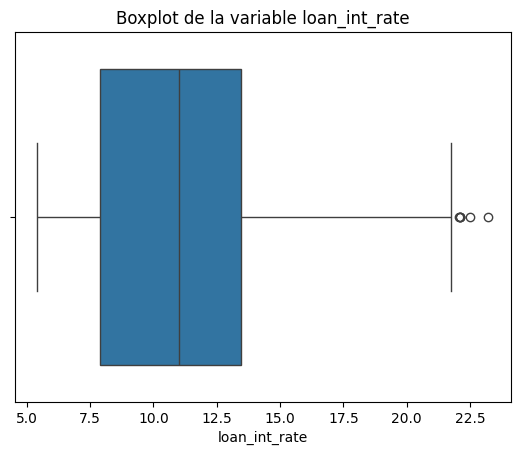

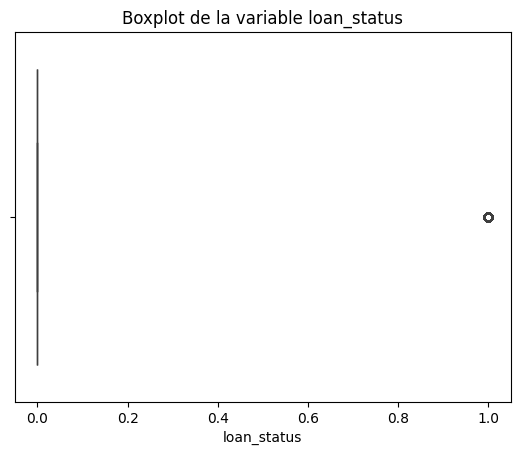

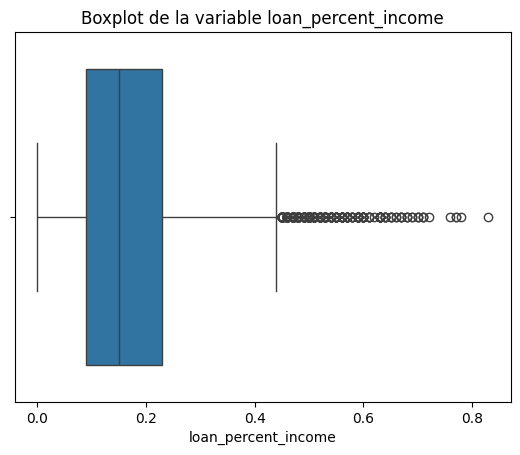

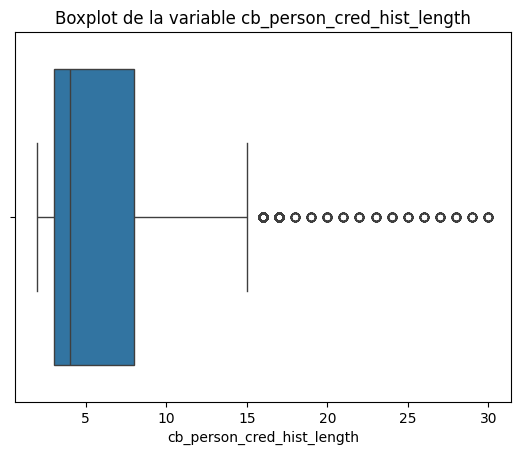

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=['int64', 'float64']):
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de la variable {col}")
    plt.show()


*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [61]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [62]:
df.describe(include='object').loc[['top']]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
top,RENT,EDUCATION,A,N


In [63]:
# Cardinalidad (cantidad de valores únicos)
df.describe(include='object').loc[['unique']]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
unique,4,6,7,2


In [64]:
for col in df.select_dtypes(include='object'):
    print(f"\nRecuentos únicos de la variable '{col}':")
    print(df[col].value_counts())



Recuentos únicos de la variable 'person_home_ownership':
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

Recuentos únicos de la variable 'loan_intent':
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

Recuentos únicos de la variable 'loan_grade':
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

Recuentos únicos de la variable 'cb_person_default_on_file':
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

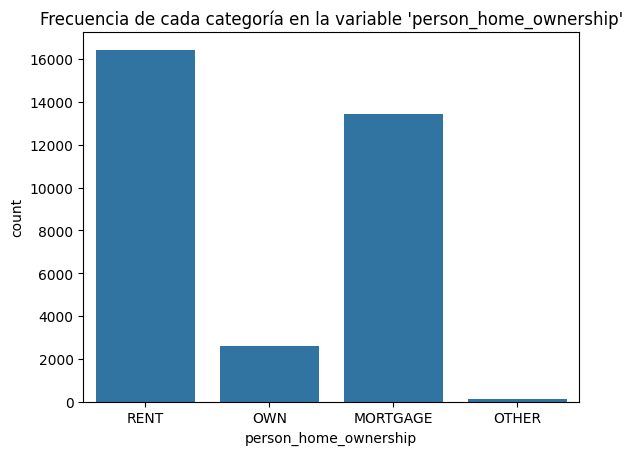

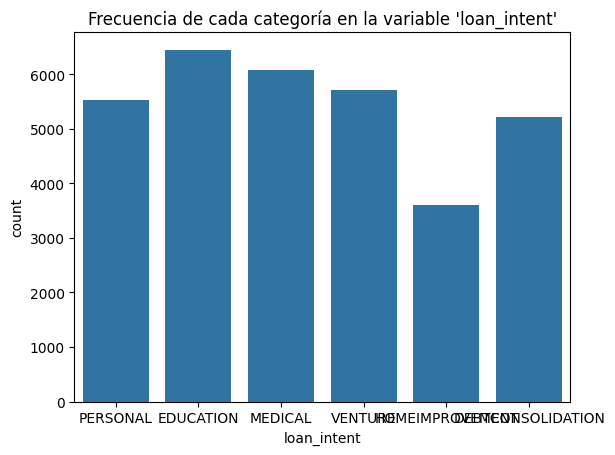

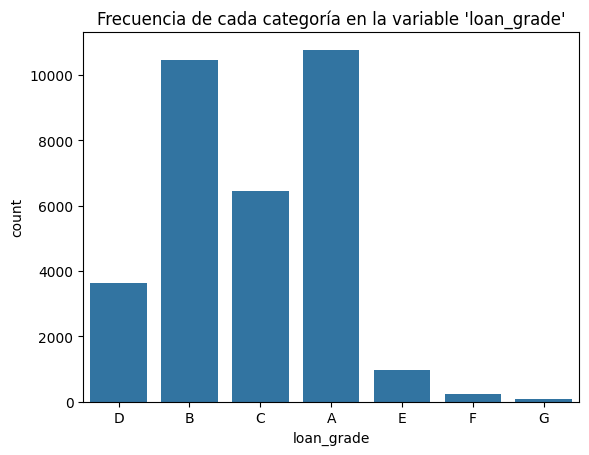

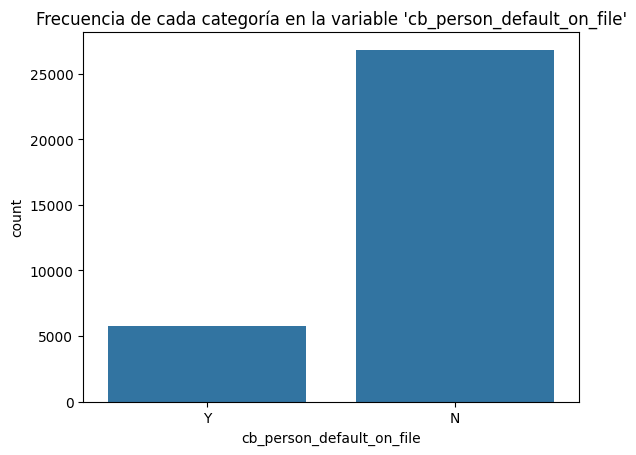

In [65]:
for col in df.select_dtypes(include='object'):
    sns.countplot(x=col, data=df)
    plt.title(f"Frecuencia de cada categoría en la variable '{col}'")
    plt.show()


# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

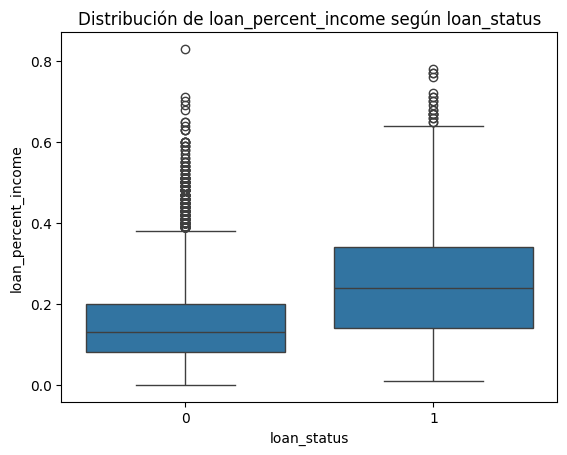

In [67]:
sns.boxplot(x="loan_status", y="loan_percent_income", data=df)
plt.title("Distribución de loan_percent_income según loan_status")
plt.show()


 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

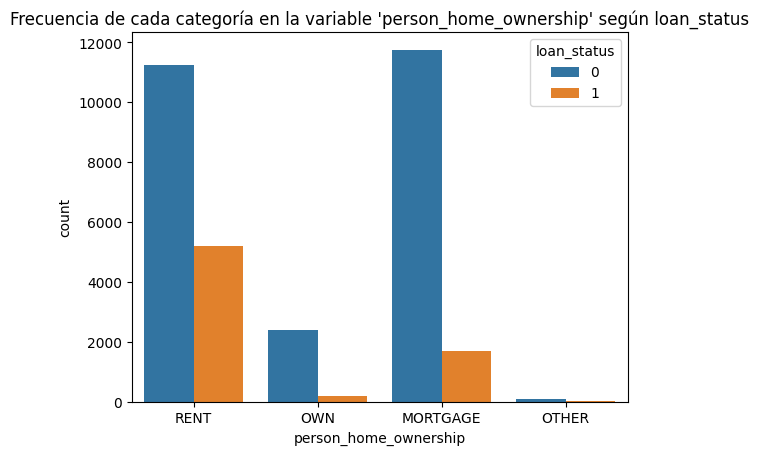

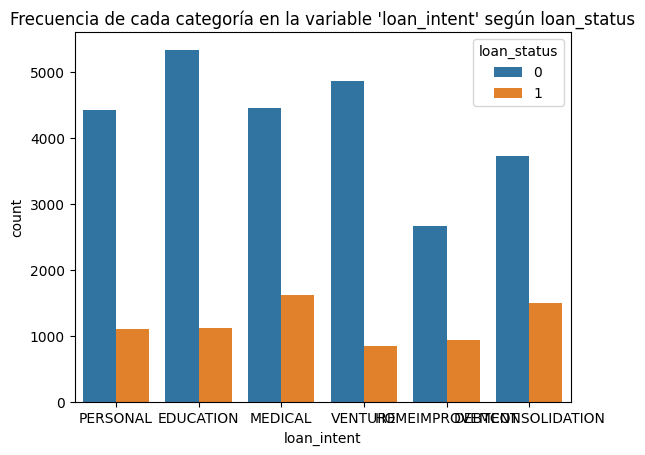

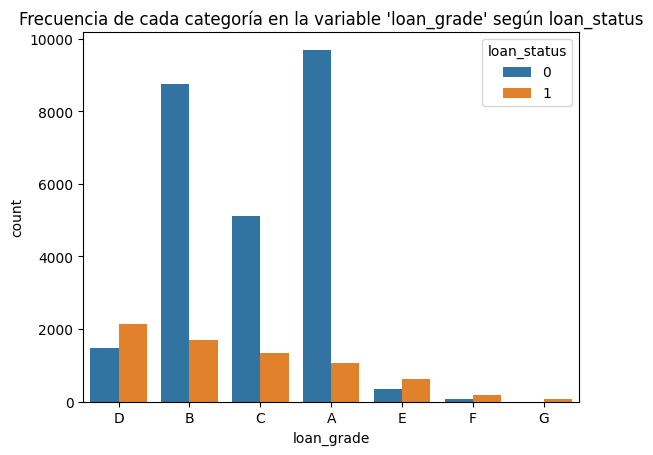

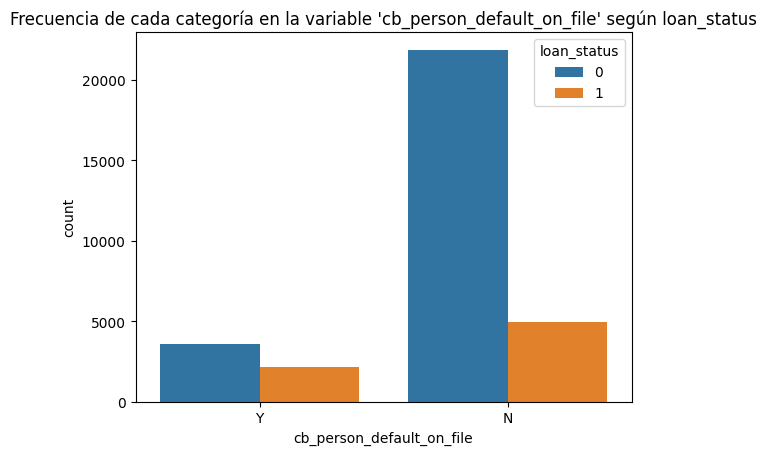

In [68]:
for col in df.select_dtypes(include='object'):
    sns.countplot(x=col, data=df, hue='loan_status')
    plt.title(f"Frecuencia de cada categoría en la variable '{col}' según loan_status")
    plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<ipython-input-71-d374613e5923>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


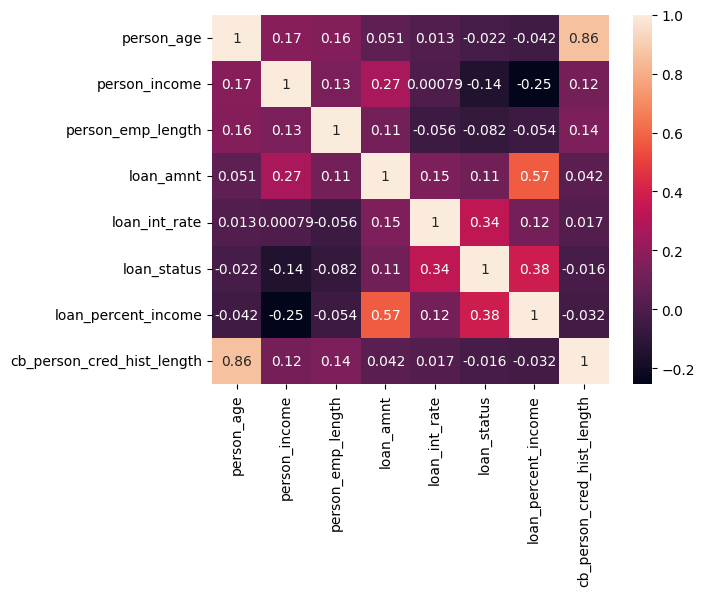

Variable con mayor correlación con loan_status: loan_percent_income


In [71]:
corr = df.corr()

# Crea un mapa de calor con la matriz de correlación
sns.heatmap(corr, annot=True)
plt.show()

# Variable con mayor correlación con loan_status
max_corr = corr['loan_status'].abs().sort_values(ascending=False)
print(f"Variable con mayor correlación con loan_status: {max_corr.index[1]}")
